Data science 4

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing4.csv")

1. CRIM      --per capita crime rate by town
2. ZN        --proportion of residential land zoned for lots over 25,000 sq.ft.
             
3. INDUS     --proportion of non-retail business acres per town
4. CHAS      --Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
         
5. NOX       --nitric oxides concentration (parts per 10 million)
6. RM        --average number of rooms per dwelling
7. AGE       --proportion of owner-occupied units built prior to 1940
8. DIS       --weighted distances to five Boston employment centres
9. RAD       --index of accessibility to radial highways
10. TAX      --full-value property-tax rate per $10,000
11. PTRATIO  --pupil-teacher ratio by town
12. B        --1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
             
13. LSTAT    --% lower status of the population
14. MEDV     --Median value of owner-occupied homes in $1000's

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
df.shape

(506, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [19]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [20]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [48]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


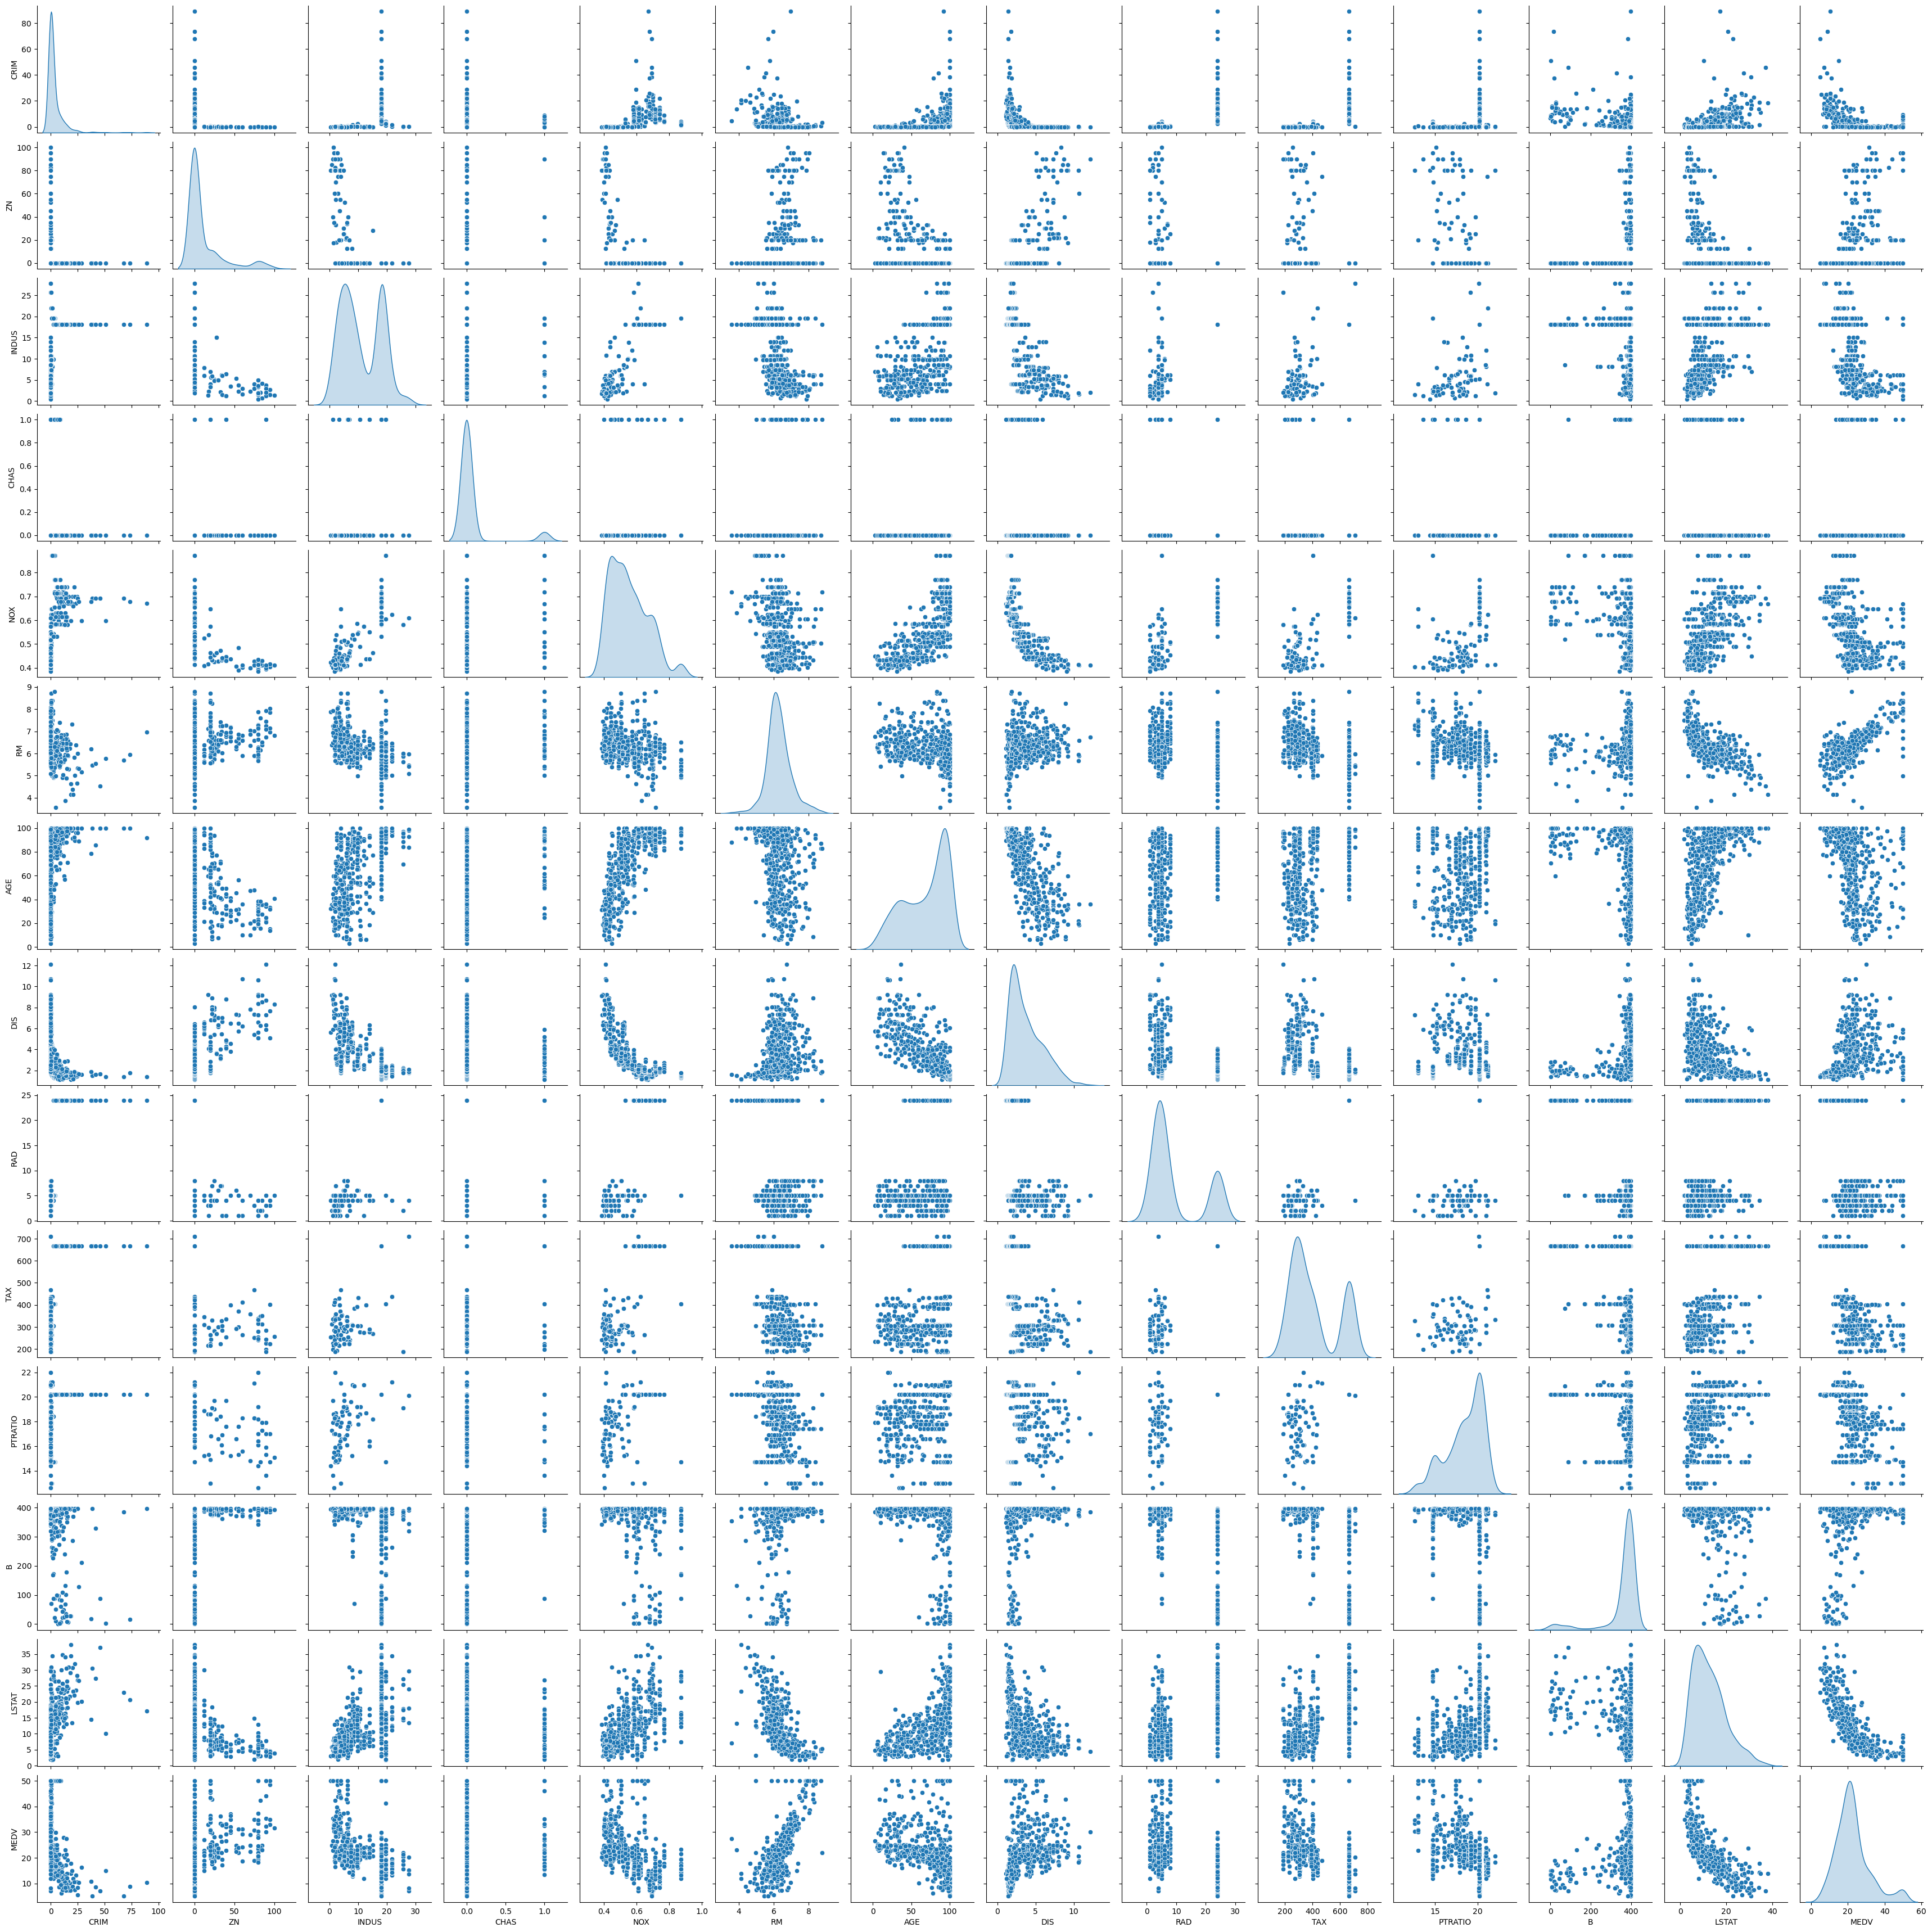

In [24]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [25]:
X = df.drop('MEDV',axis=1)
y=df['MEDV']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
test_predictions = model.predict(X_test)

In [35]:
test_predictions

array([40.20530492, 27.51362318, 15.67522143, 16.86884909, 31.08213911,
       32.76882583, 39.09283168,  8.82466039, 33.22474638,  7.15792564,
       30.11246988, 14.08346066, 16.30536945, 16.51386167, 25.2743359 ,
       19.97857709,  6.81246324, 33.08490121, 28.54069899, 24.72212978,
       13.00999685, 20.82768406, 22.52808302, 24.24156098, 33.96827004,
       18.7024587 , 30.77145225, 19.04446452, 25.21793606, 34.21543709,
       19.67471556, 18.52520081, 36.96201748, 43.31834725, 31.0933504 ,
       22.67324952, 15.45429133, 18.10174792,  4.63307946, 30.99203249,
       24.4731204 , 16.18207125, 34.65544267, 14.24703565, 17.68255621,
       25.41500271, 30.63257332, 16.63584756, 26.77928463, 22.77059637,
       32.3004945 ])

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [37]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [38]:
MAE

4.059123747882859

In [39]:
MSE

34.78342672703445

In [40]:
RMSE

5.897747597772768

In [41]:
model.coef_

array([-1.13476349e-01,  4.64006242e-02,  1.95871074e-02,  1.96846927e+00,
       -1.78004958e+01,  3.51910410e+00,  2.48736169e-03, -1.53554738e+00,
        2.86000300e-01, -1.20098899e-02, -9.57342683e-01,  9.41196642e-03,
       -5.26703375e-01])

In [61]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.113476
ZN,0.046401
INDUS,0.019587
CHAS,1.968469
NOX,-17.800496
RM,3.519104
AGE,0.002487
DIS,-1.535547
RAD,0.286000
TAX,-0.012010


In [63]:
coeff_df=coeff_df.sort_values(by=['Coefficient'])
coeff_df

,Coefficient
NOX,-17.800496
DIS,-1.535547
PTRATIO,-0.957343
LSTAT,-0.526703
CRIM,-0.113476
TAX,-0.012010
AGE,0.002487
B,0.009412
INDUS,0.019587
ZN,0.046401


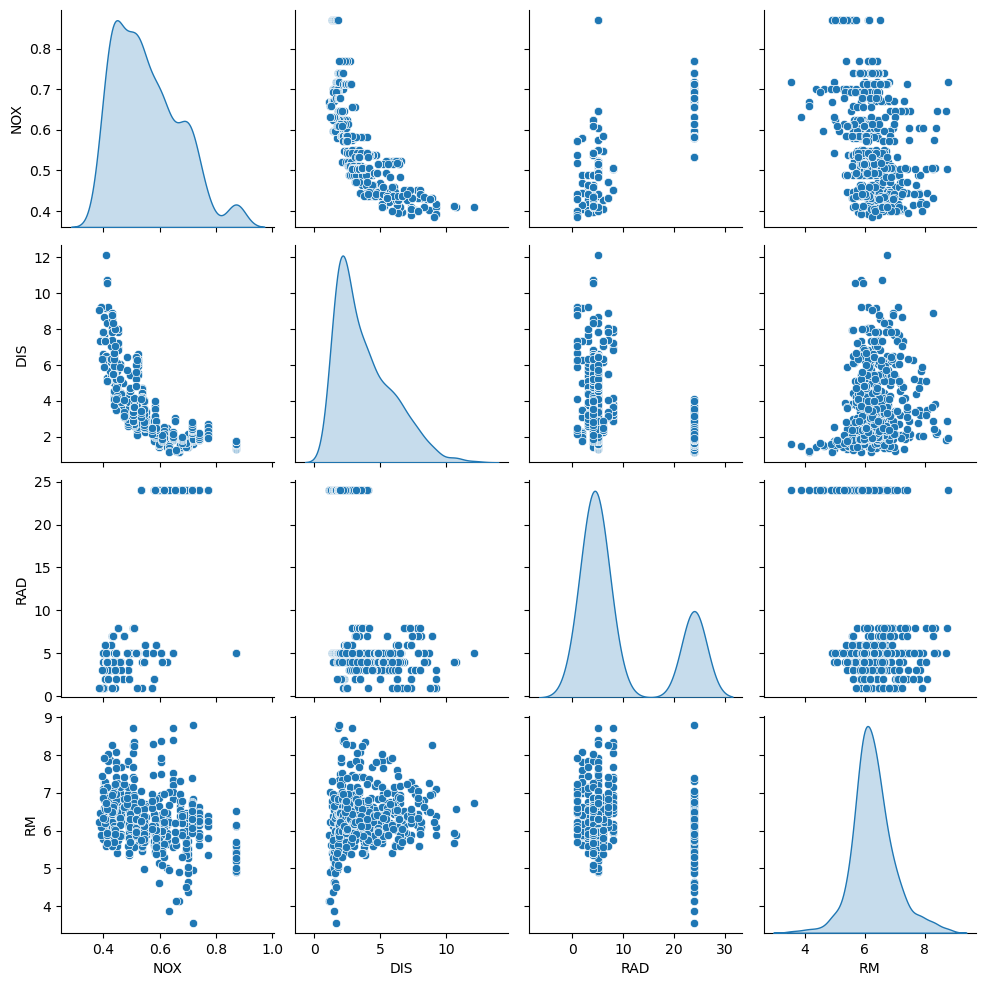

In [69]:
sns.pairplot(df[['NOX','DIS','RAD','RM']],diag_kind='kde')
plt.show()

In [56]:
df.iloc[[50]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
50,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4,243,16.8,395.56,13.45,19.7


In [50]:
testing=df.iloc[[50]].drop('MEDV',axis=1)

In [51]:
testing_prediction = model.predict(testing)

In [54]:
testing_prediction

array([21.11182292])